# Exploratory data analysis

Perform exploratory data analysis of peak spreading data.

In [67]:
using CSV
using DataFrames
using Dates
using Plots
using Suppressor
using CategoricalArrays
using Statistics
using CodecZlib
using StatsBase
using Printf

# Site configuration
const DATA_PATH = "/Volumes/Pheasant Ridge/pems/"

"/Volumes/Pheasant Ridge/pems/"

In [119]:
# periods is a dict of period name (e.g. pre-pandemic, post-pandemic, etc.) to dates (inclusive) for said period
# days is the days of the week to retain (e.g. dropping weekends)
function read_day_file(path::String) #, periods::Dict{String, Tuple{Date, Date}}, days::Vector{String})
    cols = [:timestamp, :station, :district, :freeway_number, :direction, :lane_type, :station_len, :samples, :pct_obs, :total_flow, :avg_occ, :avg_speed_mph]

    # for efficiency, don't make it autodetect types
#     types = Dict(
#         :timestamp => String,
#         :station => UInt16,
#         :district => UInt8,
#         :freeway_number => Int8,
#         :direction => String,
#         :lane_type => String,
#         :station_len => Float64,
#         :samples => UInt16,
#         :pct_obs => Float64,
#         :total_flow => Int64,
#         :avg_occ => Float64,
#         :avg_speed_mph => Float64
#     )
    
    open(GzipDecompressorStream, path) do stream
        data = undef
        # suppress warnings because per-lane information is in remaining columns, and since roads
        # do not all have the same number of lanes, not all rows have same number of columns. Ignore
        # warnings about that.
        @suppress begin
            data = CSV.read(stream, DataFrame, select=1:12, header=cols, dateformat="mm/dd/yyyy HH:MM:SS")#, types=types)
        end
        
        # make date parsing faster by caching
#         cache = Dict{String, DateTime}()
#         data.timestamp = get!.([cache], data.timestamp, [d -> DateTime(d, "mm/dd/yyyy HH:MM:SS")])
        
        # create bare date/time fields
        data.date = Dates.Date.(data.timestamp)
        data.day_of_week = Dates.dayname.(data.timestamp)
        data.time = Dates.Time.(data.timestamp)
        
        # TODO more stuff could become categories here
        
#         # name periods
#         data.period .= missing
        
#         for (periodname, bounds) in periods
#             data[(data.date .>= bounds[1]) .& (data.date .<= bounds[2]), :period] .= periodname
#         end
        
#         # this syntax creates a copy, which is what we want - save the memory from the unselected observations
#         # https://discourse.julialang.org/t/does-indexing-over-a-subset-of-rows-in-a-dataframe-return-a-view-or-a-copy/46109/2
#         data = data[.!ismissing.(data.period) .& in.(data.day_of_week, [Set(days)]), !]
        return data
    end
end

read_day_file (generic function with 1 method)

In [123]:
d[!, :test] .= "a"

1118592-element Vector{String}:
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 ⋮
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"

In [124]:
d.test

1118592-element Vector{String}:
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 ⋮
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"
 "a"

In [121]:
@time d = read_day_file(joinpath(DATA_PATH, "d04_text_station_5min_2019_07_17.txt.gz"))

 43.424197 seconds (96.20 M allocations: 5.430 GiB, 13.78% gc time)


,timestamp,station,district,freeway_number,direction,lane_type,station_len
,DateTime,Int64,Int64,Int64,String,String,Float64?
1,2019-07-17T00:00:00,400000,4,101,S,ML,0.415
2,2019-07-17T00:00:00,400001,4,101,N,ML,0.265
3,2019-07-17T00:00:00,400002,4,101,S,ML,0.31
4,2019-07-17T00:00:00,400006,4,880,S,ML,0.34
5,2019-07-17T00:00:00,400007,4,101,N,ML,0.365
6,2019-07-17T00:00:00,400009,4,80,W,ML,0.321
7,2019-07-17T00:00:00,400010,4,101,N,ML,0.47
8,2019-07-17T00:00:00,400011,4,101,S,ML,0.225
9,2019-07-17T00:00:00,400014,4,101,N,ML,0.29


In [86]:
d.time = Time.(d.timestamp)

1118592-element Vector{Time}:
 00:00:00
 00:00:00
 00:00:00
 00:00:00
 00:00:00
 00:00:00
 00:00:00
 00:00:00
 00:00:00
 00:00:00
 00:00:00
 00:00:00
 00:00:00
 ⋮
 23:55:00
 23:55:00
 23:55:00
 23:55:00
 23:55:00
 23:55:00
 23:55:00
 23:55:00
 23:55:00
 23:55:00
 23:55:00
 23:55:00

In [87]:
function peak_hour_factor5(time, avg_occ)::Tuple{Union{Missing, Time}, Union{Missing, Float64}}
    if any(ismissing.(avg_occ))
        return missing, missing
    end
    sorter = StatsBase.ordinalrank(time)
    sorted_occ = avg_occ[sorter]
    sorted_time = time[sorter]    
    @assert length(sorted_occ) == (24 * 12)  # 12 5 minute periods per hour, 24 hours per day
    highest_peak = 0.0
    start_of_highest_peak = missing
    for i in 1:(23 * 12)
        peak_amt = sum(sorted_occ[i:i + 12])
        if peak_amt > highest_peak
            highest_peak = peak_amt
            start_of_highest_peak = sorted_time[i]
        end
    end
    
    @assert !ismissing(start_of_highest_peak)
    
    # normalize to total traffic for day
    phf = highest_peak / sum(avg_occ)
    return start_of_highest_peak, phf
end

peak_hour_factor5 (generic function with 1 method)

In [113]:
function peak_hour_factor_binary(time, avg_occ)
    if any(ismissing.(avg_occ))
        return (peak_hour_start=missing, peak_hour_occ=missing)
    end
    
    sorter = StatsBase.ordinalrank(time)
    sorted_occ = avg_occ[sorter]
    sorted_time = time[sorter]    
    if length(sorted_occ) != (24 * 12)  # 12 5 minute periods per hour, 24 hours per day
        return (peak_hour_start=missing, peak_hour_occ=missing)
    end
            
    highest_peak = -1.0
    start_of_highest_peak = missing
    for i in 1:(23 * 12)
        peak_amt = sum(sorted_occ[i:i + 12])
        if peak_amt > highest_peak
            highest_peak = peak_amt
            start_of_highest_peak = sorted_time[i]
        end
    end
    
    @assert !ismissing(start_of_highest_peak)
    
    # normalize to total traffic for day
    phf = highest_peak / sum(avg_occ)
    return (peak_hour_start=start_of_highest_peak, peak_hour_occ=phf)
end

peak_hour_factor_binary (generic function with 1 method)

In [116]:
typeof(peak_hour_factor_binary(bridge.time, bridge.avg_occ))

NamedTuple{(:peak_hour_start, :peak_hour_occ), Tuple{Time, Float64}}

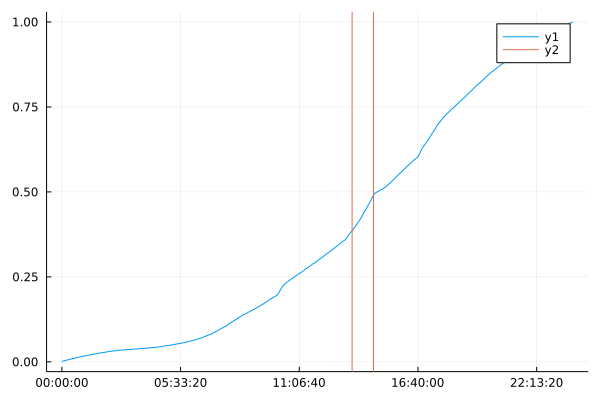

In [104]:
plot(bridge.time, cumsum(bridge.avg_occ) / sum(bridge.avg_occ))
vline!([Time(13, 35), Time(14, 35)])

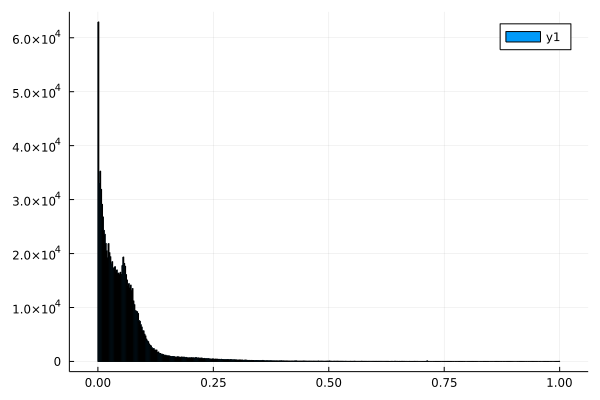

In [100]:
histogram(collect(skipmissing(d.avg_occ)))

In [95]:
peak_hour_factor_binary(bridge.time, bridge.avg_occ)

(Time(13, 35), 0.11164178361287004)

In [ ]:
bridge.avg

In [117]:
@time peaks = combine(groupby(d, :station), [:time, :avg_occ] => peak_hour_factor_binary => [:peak_hour_start, :peak_hour_occ])

  6.069365 seconds (2.59 M allocations: 307.596 MiB, 20.47% compilation time)


,station,peak_hour_start,peak_hour_occ
,Int64,Time?,Float64?
1,400000,06:40:00,0.0880695
2,400001,08:40:00,0.227868
3,400002,17:10:00,0.0864718
4,400006,09:40:00,0.121138
5,400007,07:35:00,0.0780842
6,400009,07:00:00,0.112821
7,400010,07:50:00,0.136977
8,400011,07:30:00,0.139936
9,400014,05:40:00,0.0763249


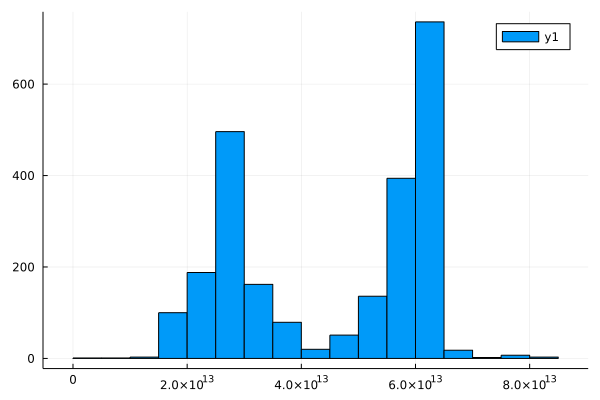

In [118]:
histogram(collect(skipmissing(peaks.peak_hour_start)))

sum(1:10)

In [76]:
mean(ismissing.(peaks.peak_hour_factor))

0.23293585526315788

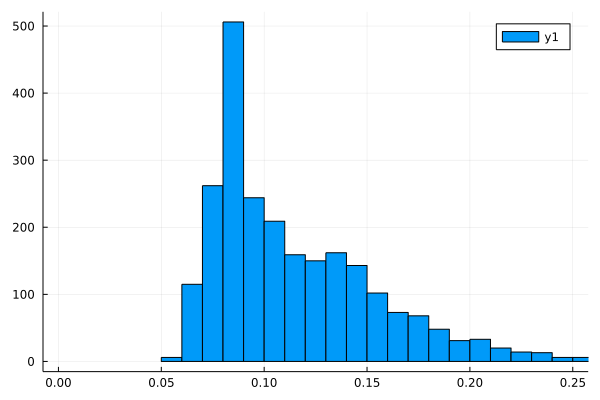

In [89]:
histogram(collect(skipmissing(peaks.peak_hour_factor)), xlim=[0, 0.25])

In [91]:
peaks[peaks.station .== 402815, :]

,station,peak_hour_factor
,Int64,Float64?
1,402815,0.111642


In [83]:
peaks[coalesce.((peaks.peak_hour_factor .< 0.1) .& (peaks.peak_hour_factor .> 0.08), false), :]

,station,peak_hour_factor
,Int64,Float64?
1,715898,0.0994301
2,715923,0.0958378
3,715930,0.0848309
4,715933,0.0894641
5,715961,0.0823869
6,715972,0.0988262
7,715996,0.0909031
8,716011,0.0927965
9,716014,0.0874464


In [82]:
?coalesce

search: coalesce



```
coalesce(x, y...)
```

Return the first value in the arguments which is not equal to [`missing`](@ref), if any. Otherwise return `missing`.

See also [`something`](@ref).

# Examples

```jldoctest
julia> coalesce(missing, 1)
1

julia> coalesce(1, missing)
1

julia> coalesce(nothing, 1)  # returns `nothing`

julia> coalesce(missing, missing)
missing
```
